# Generate atmospheric gravity-wave perturbations using Gardner's model
Python implementation of Gardner's model from:

*Gardner, C. S., Hostetler, C. A., & Franke, S. J. (1993). Gravity wave models for the horizontal wave number spectra of atmospheric velocity and density fluctuations. Journal of Geophysical Research: Atmospheres, 98(D1), 1035-1049. https://doi.org/10.1029/92JD02051*

In [19]:
%matplotlib inline
import generate_Gardner_perturbations as ggp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Below, default altitude parameters from:

*Norris, D., & Gibson, R. (2002). InfraMAP enhancements: environmental/propagation variability and localization accuracy of infrasonic networks. In Proceedings of the 24th Seismic Research Review—Nuclear Explosion Monitoring: Innovation and Integration (pp. 809-813). https://www.ldeo.columbia.edu/res/pi/Monitoring/Doc/Srr_2002/print/06-10.pdf*

In [2]:
options={}
    
## Alitude levels for each perturbation component
options['z'] = 1000*np.array([ 84, 70, 45, 21]) # m Norris & Gibson 2002
options['m_star_vec'] = [8.8619*0.00001, 1.3226*0.0001, 2.7120*0.0001, 5.3350*0.0001] # Norris & Gibson 2002
options['mb_vec'] = [1.7017*0.001, 2.5398*0.001, 5.2076*0.001, 1.0104*0.01] # Brunt-V freqs Norris & Gibson 2002
options['const'] = 1
m_1 = 0;
m_2 = 0.01; 
N_m = 20001;
options['m'] = np.linspace(m_1, m_2, N_m).T
options['q'] = 3
options['s'] = 2

Below, select model parameters in `options` dictionnary:

`z_range_wanted (array float, m): altitude range of perturbation profile `

`stds_wanted_default (list float, m/s): standard deviation for the perturbation amplitude at each altitude level`

`amps (list float, m/s): List of amplitude scaling factors at each altitude level for each realization `

`N_realizations_per_set (int): Number of realization requested`

`output_dir (str): output directory to save model`

In [9]:
## Profile alitutde limits
options['z_range_wanted'] = 1000* np.array([0, 150]) # [m]

## The standard deviation wanted for each of the "perturbation levels"
options['stds_wanted_default'] = [22.53, 15.13, 7.4, 3.73]
default = np.array([1, 1, 1, 1])
options['amps'] = [ default, 1.3 * default, 1.6 * default, 2   * default, 1.1 * default,
  1.15* default, 
  1.2 * default, 
  1.25* default, 
  0.80* default,
  0.60* default]
options['N_realizations_per_set'] = 5

## Output dir to save model
options['output_dir']='./'

Below, call `Gardner_model` class to initialize Gardner model and call `compute_Gardner_for_amps` to compute all Gardner realizations. `model.df_Perturbations` is the output `DataFrame` that contains the Gardner perturbations: 
- for each `amps` in columns `no-std`
- for each `N_realizations_per_set` in columns `no-per-std`

In [10]:
## Compute Gardner perturbations
model = ggp.Gardner_model(options)
model.compute_Gardner_for_amps()
model.save_model()

Text(0, 0.5, 'Altitude (m)')

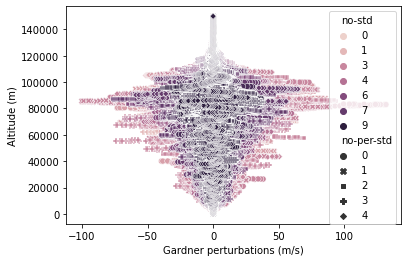

In [20]:
## Plot results
sns.scatterplot(data=model.df_Perturbations, x='wind', y='z_axis', hue='no-std', style='no-per-std')
plt.xlabel('Gardner perturbations (m/s)')
plt.ylabel('Altitude (m)')